<a href="https://colab.research.google.com/github/yashsingla1/machine-learning1/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


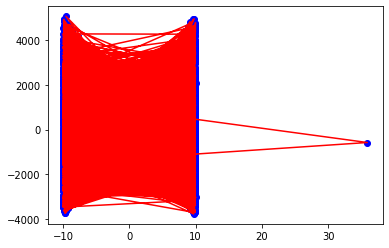

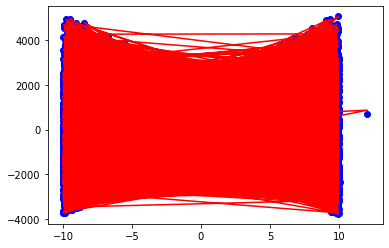

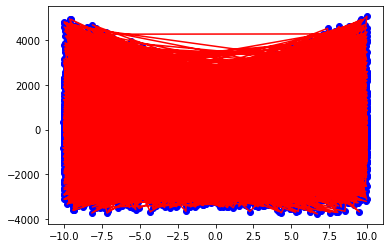

[ -648.772176    -544.80659485   -75.58516918 ... -1770.67043142
   -22.64170835   -65.56294132]
2.9655757542727774


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Polynomial_train.csv')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = df.values[:, 1]
y = df.values[:, 2]
z = df.values[:, 3]
l= df.values[:, 4]
m=len(x)

#print(x)
#print(y)
#print(z)

b=np.empty([m,27])
for j in range(m):
  b[j][0]=x[j]
  b[j][1]=x[j]**2
  b[j][2]=x[j]*y[j]
  b[j][3]=(x[j])*(y[j]**5)
  b[j][4]=(x[j]**5)*(y[j])
  b[j][5]=y[j]
  b[j][6]=y[j]**2
  b[j][7]=(y[j]**11)*(x[j]**2)
  b[j][8]=(y[j]**2)*(x[j]**3)
  b[j][9]=y[j]*(z[j]**16)
  b[j][10]=z[j]
  b[j][11]=z[j]**2
  b[j][12]=z[j]*y[j]
  b[j][13]=z[j]*x[j]
  b[j][14]=z[j]*(x[j]**2)
  b[j][15]=z[j]*(y[j]**2)
  b[j][16]=y[j]*(z[j]**19)
  b[j][17]=z[j]*(y[j]**17)
  b[j][18]=x[j]*(z[j]**19)
  b[j][19]=(y[j]**3)*(x[j]**3)
  b[j][20]=(z[j]**5)*(x[j]**2)
  b[j][21]=x[j]*(z[j]**2)
  b[j][22]=(y[j]**2)*(z[j]**3)
  b[j][23]=z[j]*(x[j]**13)
  b[j][24]=(z[j]**3)*x[j]*(y[j]**9)
  b[j][25]=(z[j]**4)*(x[j]**4)*(y[j]**2)
  b[j][26]=(z[j]**2)*(x[j]**2)*(y[j]**6)
 
   
  #b[j][11]=z[j]**4

'''def feature_normalize(b):
	minmax = list()
	for i in range(len(b[0])):
		col_values = [row[i] for row in b]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax'''

def feature_normalize(b):
  mu = np.mean(b, axis = 0)
  sigma = np.std(b, axis= 0,ddof=0)
  b_norm = (b - mu)/sigma
  return b_norm,mu,sigma
b,mu,sigma=feature_normalize(b)  
a=np.average(b,axis=0)

'''
def normalize_dataset(b, minmax):
	for row in b:
		for i in range(len(row)):
			row[i] = (row[i] - a[i]) / (minmax[i][1] - minmax[i][0])
minmax = feature_normalize(b)
normalize_dataset(b, minmax)'''

b = np.hstack((np.ones((m,1)), b))


def compute_cost(b, l, theta):
  predictions = b.dot(theta)
  errors = np.subtract(predictions, l)
  sqrErrors = np.square(errors)
  J = 1/(2 * m) * errors.dot(errors)
  return J

def gradient_descent(b, l, theta, alpha, iterations):
  cost_history = np.zeros(iterations)
  for i in range(iterations):
    predictions = b.dot(theta)
    
    errors = np.subtract(predictions, l)
    sum_delta = (alpha / m) * b.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = compute_cost(b, l, theta) 
  return theta, cost_history
                          
theta = np.zeros(28)
iterations =5000;
alpha = 0.01;


theta, cost_history = gradient_descent(b, l, theta, alpha, iterations)
p=b.dot(theta)
#print(theta)
#print(b)
plt.scatter(x,l,color="blue")  
plt.plot(x,p,color="red")
plt.show()  
plt.scatter(y,l,color="blue")  
plt.plot(y,p,color="red")    
plt.show()  
plt.scatter(z,l,color="blue") 
plt.plot(z,p,color="red")        
plt.show()  
df2=pd.read_csv('gdrive/My Drive/Polynomial_test.csv')
x1=df2.values[:, 1]
y1=df2.values[:, 2]
z1=df2.values[:, 3]
l1=df2.values[:, 4]
m1=len(y1)
#m1=2500
b1=np.empty([m1,27])
for j in range(m1):

  b1[j][0]=x1[j]
  b1[j][1]=x1[j]**2
  b1[j][2]=x1[j]*y1[j]
  b1[j][3]=(x1[j])*(y1[j]**5)
  b1[j][4]=(x1[j]**5)*(y[j])
  b1[j][5]=y1[j]
  b1[j][6]=y1[j]**2
  b1[j][7]=(y1[j]**11)*(x1[j]**2)
  b1[j][8]=(y1[j]**2)*(x1[j]**3)
  b1[j][9]=y1[j]*(z1[j]**16)
  b1[j][10]=z1[j]
  b1[j][11]=z1[j]**2
  b1[j][12]=z1[j]*y1[j]
  b1[j][13]=z1[j]*x1[j]
  b1[j][14]=z1[j]*(x1[j]**2)
  b1[j][15]=z1[j]*(y1[j]**2)
  b1[j][16]=y1[j]*(z1[j]**19)
  b1[j][17]=z1[j]*(y1[j]**17)
  b1[j][18]=x1[j]*(z1[j]**19)
  b1[j][19]=(y1[j]**3)*(x1[j]**3)
  b1[j][20]=(z1[j]**5)*(x1[j]**2)
  b1[j][21]=x1[j]*(z1[j]**2)
  b1[j][22]=(y1[j]**2)*(z1[j]**3)
  b1[j][23]=z1[j]*(x1[j]**13)
  b1[j][24]=(z1[j]**3)*x1[j]*(y1[j]**9)
  b1[j][25]=(z1[j]**4)*(x1[j]**4)*(y1[j]**2)
  b1[j][26]=(z1[j]**2)*(x1[j]**2)*(y1[j]**6)
  


'''
for row in b1:
		for i in range(len(row)):
			row[i] = (row[i] - a[i]) / (minmax[i][1] - minmax[i][0])
'''
#b1= np.hstack((np.ones((m1,1)), b1))
b1 = (b1 - mu)/sigma
b1= np.hstack((np.ones((m1,1)), b1))
price =b1.dot(theta)
print(price)
errors = np.subtract(price,l1)
sqrErrors = np.square(errors)
sum=0
for i in range(m1):
  sum=sum+sqrErrors[i]

mean=sum/m1
root=mean**0.5
print(root)